## xml読み込みテスト

In [9]:
import os

import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt

In [10]:
root_dir_path = 'C:\\Users\\yishi\\Desktop\\Jmees\\prototype_modified_data'
xml_path = "C:\\Users\\yishi\\Desktop\\Jmees\\prototype_modified_data\\train\\grade_1\\Annotations\\IMG_0007.xml"
image_path = "C:\\Users\\yishi\\Desktop\\Jmees\\prototype_modified_data\\train\\grade_1\\image\\IMG_0007.jpg"
save_dir_name = 'cutouted_img'
save_path = image_path.replace('image', save_dir_name)

In [11]:
# xmlを解析
tree = ET.parse(xml_path)
# xmlを取得
root = tree.getroot()

In [12]:
# filenameを取得
filename = ''
for tag in root.findall('filename'):
    filename = tag.text
# 画像パスを作成
image_path = xml_path.replace(
    f"Annotations\\{filename}.xml",
    f"image\\{filename}.jpg")
if not os.path.exists(image_path):
    print("NG")

In [15]:
# 画像の切り取り範囲を取得
pos = ['xmin', 'xmax', 'ymin', 'ymax']
cutout_pos = {}
for p in pos:
    text =  [
        int(tag.text) for tag in root.iter(p)
    ]
    print('text: ', text)
    cutout_pos[p] =text[0]  
print(cutout_pos)

text:  [865]
text:  [1495]
text:  [1181]
text:  [1886]
{'xmin': 865, 'xmax': 1495, 'ymin': 1181, 'ymax': 1886}


(3264, 2448, 3)


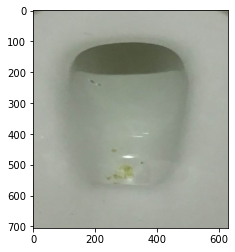

In [14]:
# 画像切り取り
bgr_img = cv2.imread(image_path)
print(bgr_img.shape)
xmin = cutout_pos[pos[0]]
xmax = cutout_pos[pos[1]]
ymin = cutout_pos[pos[2]]
ymax = cutout_pos[pos[3]]
cutouted_img = bgr_img[ymin:ymax, xmin:xmax]
show_img = cv2.cvtColor(cutouted_img, cv2.COLOR_BGR2RGB)
plt.imshow(show_img)

## xml情報から画像切り出し

In [18]:
import os
import glob

import xml.etree.ElementTree as ET
import cv2

In [35]:
root_dir_path = 'C:\\Users\\yishi\\Desktop\\Jmees\\nurscope_brain\\train'
save_root_dir = 'C:\\Users\\yishi\\Desktop\\Jmees\\src\\input\\train_1-7_size'
grades = ['grade_1', 'grade_2', 'grade_3']
# アノテーション矩形の何倍の大きさで切り抜くかの数値
multiple_index = 1.7

In [36]:
# xmlパスを取得
xml_paths = glob.glob(os.path.join(root_dir_path, '*\\*\\Annotations\\*.xml'))
print(len(xml_paths))

1377


In [37]:
# 切り出し範囲を指定する
def specify_cutout_range(cutout_pos, multiple_index, img_shape):
    half_w = (cutout_pos[1] - cutout_pos[0]) // 2
    half_h = (cutout_pos[3] - cutout_pos[2]) // 2
    x_centor = cutout_pos[0] + half_w
    h_centor = cutout_pos[2] + half_h
    tmp = x_centor - int(half_w * multiple_index)
    x_min = tmp if tmp > 0 else 0
    
    tmp = x_centor + int(half_w * multiple_index)
    x_max = tmp if tmp < img_shape[1] else img_shape[1]
    
    tmp = h_centor - int(half_h * multiple_index)
    y_min = tmp if tmp > 0 else 0
    
    tmp = h_centor + int(half_h * multiple_index)
    y_max = tmp if tmp < img_shape[0] else img_shape[0]
    
    return x_min, x_max, y_min, y_max

In [38]:
# len_xml_paths = len(xml_paths)
for i, xml_path in enumerate(xml_paths):
    ### パス設定=========================================
    # 元画像パス作成
    img_path = xml_path.replace('Annotations', 'JPEGImages')
    img_path = img_path.replace('.xml', '.jpg')
    if not os.path.exists(img_path):
        print('Image not exist: ', img_path)
        
    # 切り出した画像保存用パス作成
    img_name = os.path.basename(img_path)
    save_path = None
    for grade in grades:
        if grade in xml_path:
            save_path = os.path.join(save_root_dir, grade, img_name)
    
    # 画像保存用dir存在確認
    save_dir_path = os.path.dirname(save_path)
    if not save_dir_path:
        raise ValueError('save_dir is None')
    if not os.path.exists(save_dir_path):
        os.makedirs(save_dir_path)
    
    ### 画像切り出し=========================================
    # xmlを解析、取得
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # 切り出し範囲取得
    pos = ['ymin', 'ymax', 'xmin', 'xmax']
    cutout_pos = []
    for p in pos:
        text = [int(tag.text) for tag in root.iter(p)]
        if len(text) > 0:
            cutout_pos.append(text[0])
    
    if len(cutout_pos) != 4:
        print(f"pos {cutout_pos}: {xml_path}")
        continue
    
    # 元画像読み込み
    img = cv2.imread(img_path)
    img_shape = img.shape
    # 元画像切り出し
    x_min, x_max, y_min, y_max = specify_cutout_range(cutout_pos, multiple_index, img_shape)
    cutouted_img = img[
        x_min:x_max, y_min:y_max
    ]
    
    # 保存
    cv2.imwrite(save_path, cutouted_img)

pos []: C:\Users\yishi\Desktop\Jmees\nurscope_brain\train\grade_2\outputs\Annotations\IMG_0614.xml
pos []: C:\Users\yishi\Desktop\Jmees\nurscope_brain\train\grade_2\outputs\Annotations\IMG_0615.xml
